[Fuente](https://www.youtube.com/watch?v=iPQ1yEVniL8)

In [1]:
!pip install neuralprophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached captum-0.7.0-py3-none-any.whl.metadata (26 kB)
  Using cached holidays-0.46-py3-none-any.whl.metadata (23 kB)
     -------------------------------------- 61.0/61.0 kB 819.4 kB/s eta 0:00:00
  Using cached plotly-5.20.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached pytorch_lightning-1.9.5-py3-none-any.whl.metadata (23 kB)
  Using cached typing_extensions-4.11.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached lightning_utilities-0.11.2-py3-none-any.whl.metadata (4.7 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 145.4/145.4 kB 2.1 MB/s eta 0:00:00
Using cached captum-0.7.0-py3-none-any.whl (1.3 MB)
Using cached holidays-0.46-py3-none-any.whl (1.0 MB)
   ---------------------------------------- 7.7/7.7 MB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.8.1 requires numpy<1.25.0,>=1.17.3, but you have numpy 1.26.4 which is incompatible.
streamlit 1.12.0 requires protobuf<4,>=3.12, but you have protobuf 4.24.2 which is incompatible.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.4 which is incompatible.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.11.0 which is incompatible.


In [4]:
!pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from neuralprophet import NeuralProphet
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt
import plotly

## Read and Preprocess the Data

In [7]:
stock_symbol = 'GOOGL'
start_date = '2015-01-01'
end_date = '2024-03-30'

stock_data = yf.download(stock_symbol, start = start_date, end = end_date)
stock_data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\yfinance\base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)

WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\yfinance\base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future beh

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000


In [8]:
stocks = stock_data.reset_index()
stocks['Date'] = pd.to_datetime(stocks['Date'])


In [9]:
stocks = stocks[['Date', 'Close']]
stocks.columns = ['ds', 'y']

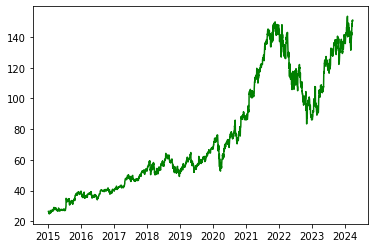

In [10]:
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.show()

## Train the model

In [11]:
model = NeuralProphet()
model.fit(stocks)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.301% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - 

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,179.014160,198.252670,1.103170,0.0,0
1,130.148895,151.650803,0.774794,0.0,1
2,81.706024,102.713493,0.450829,0.0,2
3,38.665211,50.421715,0.172023,0.0,3
4,14.427794,17.753136,0.032004,0.0,4
...,...,...,...,...,...
85,6.577410,10.116899,0.012145,0.0,85
86,6.560658,10.061376,0.012035,0.0,86
87,6.597259,10.111655,0.012123,0.0,87
88,6.584685,10.096815,0.012133,0.0,88


## Evaluate the model

WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.301% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``ast

WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``ast

Predicting: 37it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.301% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\neuralprophet\df_utils.py:1152: FutureWa

Predicting: 37it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


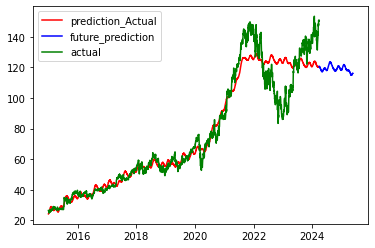

In [15]:
future = model.make_future_dataframe(stocks, periods=300)

forecast = model.predict(future)
actual_prediction = model.predict(stocks)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'prediction_Actual', c='r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c='b')
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.legend()
plt.show()

In [17]:
model.plot_components(forecast)

ERROR - (NP.plotly.plot_components) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\neuralprophet\plot_forecast_plotly.py:283: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - C:\Users\aagui\AppData\Roaming\Python\Python310\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


